# Week 14 Assignment DT_PYTHON

In [3]:
import csv
import random

def generate_data(class_label, count):

    data = []
    for _ in range(count):
        rotation_rate = round(random.uniform(0.3, 2.0), 2)
        user_acceleration_x = round(random.uniform(0.1, 1.5), 2)
        user_acceleration_y = round(random.uniform(0.1, 1.5), 2)
        data.append([rotation_rate, user_acceleration_x, user_acceleration_y, class_label])
    return data

# Generate data for different classes
walk_data = generate_data('walk', 200)
sit_data = generate_data('sit', 200)
jog_data = generate_data('jog', 200)

# Combine data for all classes
all_data = walk_data + sit_data + jog_data

# Shuffle the data
random.shuffle(all_data)

# Write data to CSV file
with open('sense.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['rotationRate.x', 'userAcceleration.x', 'userAcceleration.y', 'class'])
    # Write data
    writer.writerows(all_data)


In [4]:
import csv
import random

# Function to generate random data for a given class
def generate_data(class_label, count):

    data = []
    for _ in range(count):
        rotation_rate = round(random.uniform(0.3, 2.0), 2)
        user_acceleration_x = round(random.uniform(0.1, 1.5), 2)
        user_acceleration_y = round(random.uniform(0.1, 1.5), 2)
        data.append([rotation_rate, user_acceleration_x, user_acceleration_y, class_label])
    return data

# Generate data for each class
walk_data = generate_data('walk', 200)
sit_data = generate_data('sit', 200)
jog_data = generate_data('jog', 200)

# Combine data for all classes
all_data = walk_data + sit_data + jog_data

# Shuffle the data
random.shuffle(all_data)

# Write data to CSV file
output_file_name = 'test.csv'
with open(output_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['rotationRate.x', 'userAcceleration.x', 'userAcceleration.y', 'class'])
    # Write data
    writer.writerows(all_data)



In [5]:
import pandas as pd

In [6]:
data=pd.read_csv('/content/sense.csv',header='infer')

In [7]:
data

,rotationRate.x,userAcceleration.x,userAcceleration.y,class
0,0.51,0.15,0.28,jog
1,0.78,0.78,0.38,sit
2,1.83,0.59,0.31,jog
3,1.57,0.60,0.79,sit
4,0.68,0.83,0.44,sit
...,...,...,...,...
595,1.30,0.46,0.40,jog
596,1.89,1.19,0.89,sit
597,0.87,1.36,1.27,walk
598,0.47,1.39,0.58,jog


In [8]:
test=pd.read_csv('/content/test.csv',header='infer')

In [9]:
test

,rotationRate.x,userAcceleration.x,userAcceleration.y,class
0,0.48,0.10,0.65,jog
1,1.48,0.97,0.99,walk
2,1.41,1.17,0.33,sit
3,1.12,1.01,1.05,jog
4,0.39,1.41,0.80,sit
...,...,...,...,...
595,1.60,0.81,0.27,sit
596,0.45,0.64,1.47,jog
597,1.68,1.35,1.42,jog
598,1.21,1.07,0.15,walk


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rotationRate.x      600 non-null    float64
 1   userAcceleration.x  600 non-null    float64
 2   userAcceleration.y  600 non-null    float64
 3   class               600 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.9+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rotationRate.x      600 non-null    float64
 1   userAcceleration.x  600 non-null    float64
 2   userAcceleration.y  600 non-null    float64
 3   class               600 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.9+ KB


In [13]:
X=data.drop(['class'],axis=1)

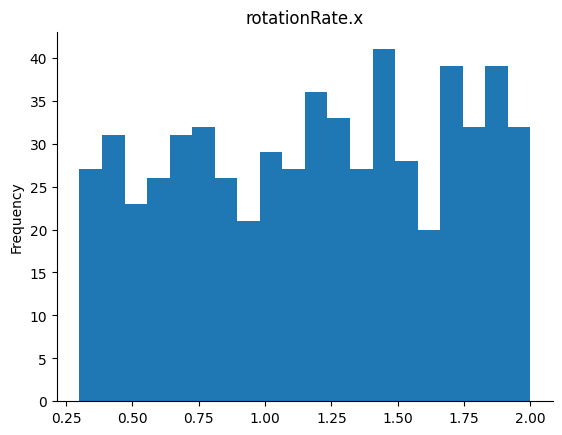

In [ ]:
from matplotlib import pyplot as plt
X['rotationRate.x'].plot(kind='hist', bins=20, title='rotationRate.x')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [23]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
Y=data['class']

In [16]:
y

0       jog
1       sit
2       jog
3       sit
4       sit
       ... 
595     jog
596     sit
597    walk
598     jog
599     jog
Name: class, Length: 600, dtype: object

In [19]:
X

,rotationRate.x,userAcceleration.x,userAcceleration.y
0,0.51,0.15,0.28
1,0.78,0.78,0.38
2,1.83,0.59,0.31
3,1.57,0.60,0.79
4,0.68,0.83,0.44
...,...,...,...
595,1.30,0.46,0.40
596,1.89,1.19,0.89
597,0.87,1.36,1.27
598,0.47,1.39,0.58


In [24]:
clf=clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
import pydotplus

In [26]:
from IPython.display import Image

In [27]:
dot_data=tree.export_graphviz(clf,feature_names= X.columns, class_names=['walk', 'sit','jog'], filled=True, out_file=None)

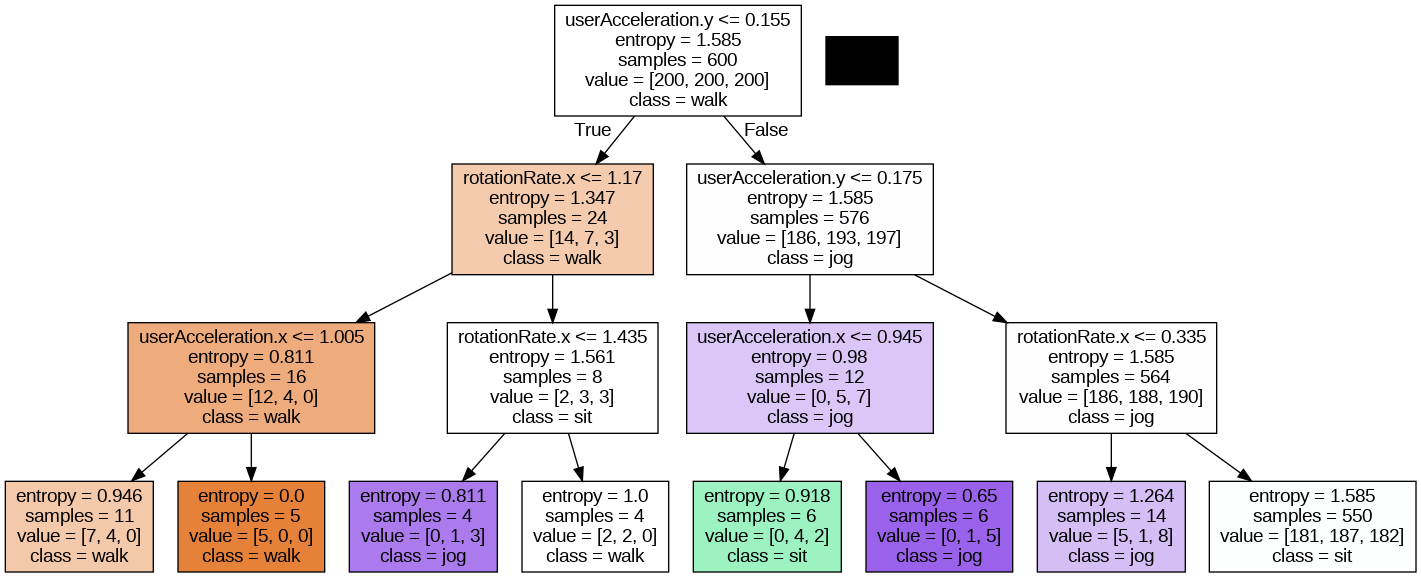

In [28]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [29]:
testData=pd.read_csv('/content/test.csv',header='infer')

In [30]:
testData=pd.DataFrame(testData, columns=test.columns)

In [31]:
testData

,rotationRate.x,userAcceleration.x,userAcceleration.y,class
0,0.48,0.10,0.65,jog
1,1.48,0.97,0.99,walk
2,1.41,1.17,0.33,sit
3,1.12,1.01,1.05,jog
4,0.39,1.41,0.80,sit
...,...,...,...,...
595,1.60,0.81,0.27,sit
596,0.45,0.64,1.47,jog
597,1.68,1.35,1.42,jog
598,1.21,1.07,0.15,walk


In [32]:
testY=testData['class']

In [34]:
testY

0       jog
1      walk
2       sit
3       jog
4       sit
       ... 
595     sit
596     jog
597     jog
598    walk
599    walk
Name: class, Length: 600, dtype: object

In [33]:
testX=testData.drop(['class'], axis=1)

In [35]:
testX

,rotationRate.x,userAcceleration.x,userAcceleration.y
0,0.48,0.10,0.65
1,1.48,0.97,0.99
2,1.41,1.17,0.33
3,1.12,1.01,1.05
4,0.39,1.41,0.80
...,...,...,...
595,1.60,0.81,0.27
596,0.45,0.64,1.47
597,1.68,1.35,1.42
598,1.21,1.07,0.15


In [36]:
predY=clf.predict(testX)

In [37]:
predY

array(['sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'walk', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'jog', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'jog', 'sit', 'sit', 'sit', 'sit', 'walk', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'walk', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit', 'sit',
       'sit', 'si

In [38]:
predictions=pd.concat([testData['class'],pd.Series(predY, name='Predicted activity')], axis=1)

In [39]:
predictions

,class,Predicted activity
0,jog,sit
1,walk,sit
2,sit,sit
3,jog,sit
4,sit,sit
...,...,...
595,sit,sit
596,jog,sit
597,jog,sit
598,walk,walk


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(testY,predY)

0.32666666666666666

In [42]:
import numpy as np
maxDepth = np.arange(1, 31)
maxDepth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [43]:
trainAcc = np.zeros(len(maxDepth))
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
testAcc = np.zeros(len(maxDepth))
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
index = 0
for depth in maxDepth:
  clf = tree.DecisionTreeClassifier(max_depth = depth)
  clf = clf.fit(X,y)
  Y_predTrain = clf.predict(X)
  Y_predTest = clf.predict(testX)
  trainAcc[index] = accuracy_score(y, Y_predTrain)
  testAcc[index] = accuracy_score(testY, Y_predTest)
  index +=1

In [49]:
trainAcc

array([0.35166667, 0.35333333, 0.37      , 0.39833333, 0.44      ,
       0.45833333, 0.50166667, 0.54      , 0.585     , 0.63      ,
       0.675     , 0.73666667, 0.795     , 0.83833333, 0.89166667,
       0.93333333, 0.96833333, 0.97833333, 0.99333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [50]:
testAcc

array([0.31666667, 0.325     , 0.32666667, 0.31      , 0.34666667,
       0.32333333, 0.32166667, 0.32333333, 0.32333333, 0.315     ,
       0.31      , 0.29166667, 0.32166667, 0.31333333, 0.295     ,
       0.295     , 0.29166667, 0.31      , 0.30666667, 0.3       ,
       0.29666667, 0.30166667, 0.29833333, 0.29833333, 0.30333333,
       0.3       , 0.305     , 0.29166667, 0.305     , 0.31      ])

# This below code snippet calculates and plots the training and test accuracies for different maximum depths of the decision tree.

Text(0, 0.5, 'Accuracy')

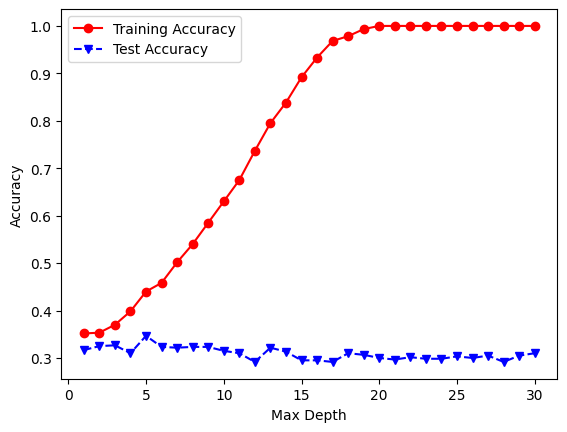

In [51]:
import matplotlib.pyplot as plt
plt.plot(maxDepth, trainAcc, 'ro-', maxDepth, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Depth Varying👨🏿‍💻

The below code shows the result of varying the maximum depth on the decision tree

# Depth 5📈

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5)

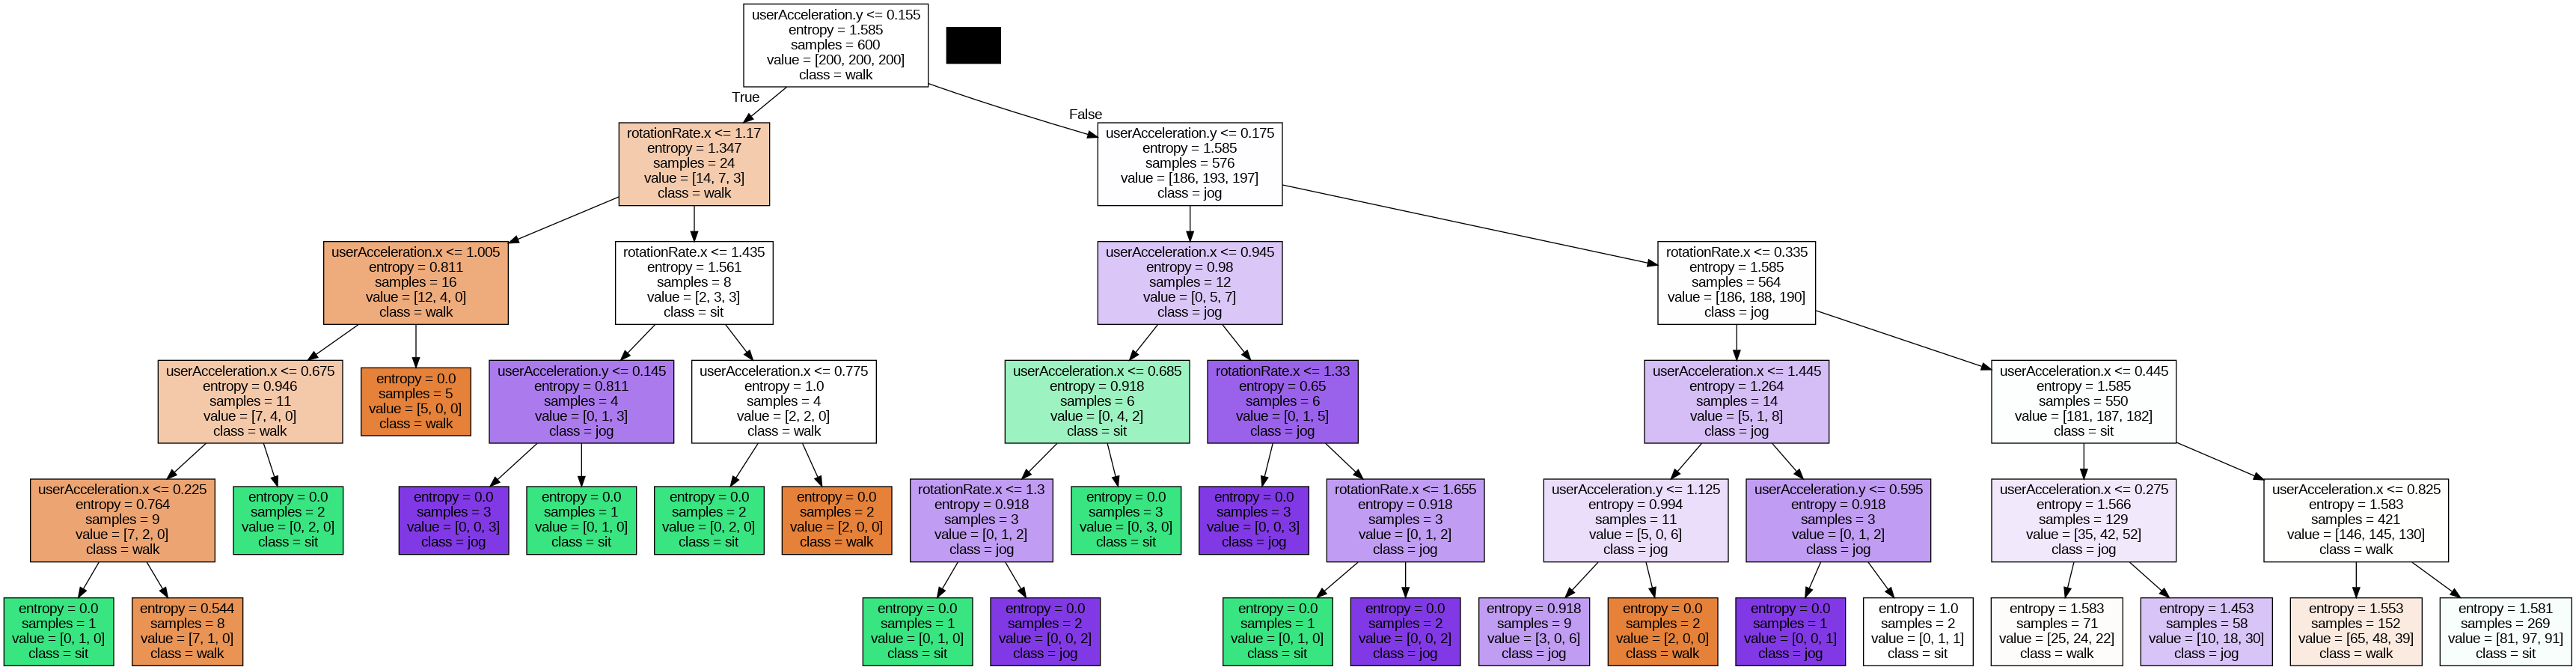

In [55]:
dot_data = tree.export_graphviz(clf, feature_names= X.columns, class_names= ['walk', 'sit', 'jog'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Depth 6📈

In [56]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 6)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

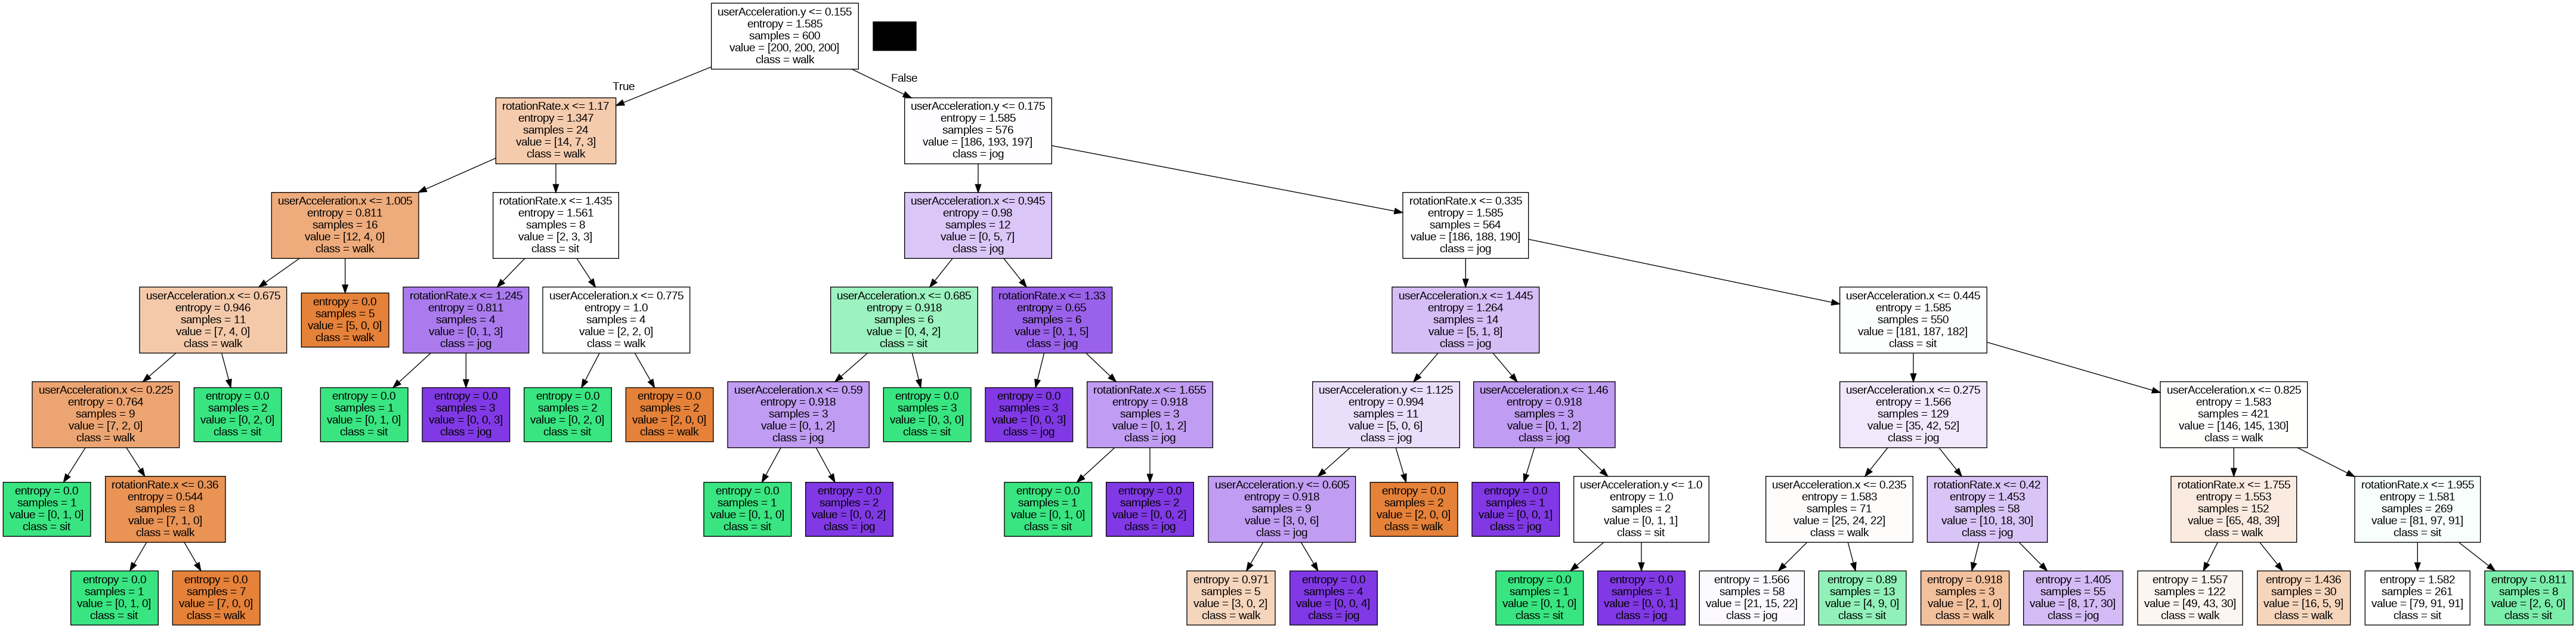

In [58]:
dot_data = tree.export_graphviz(clf, feature_names= X.columns, class_names= ['walk', 'sit', 'jog'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Depth 7📈

In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=7)

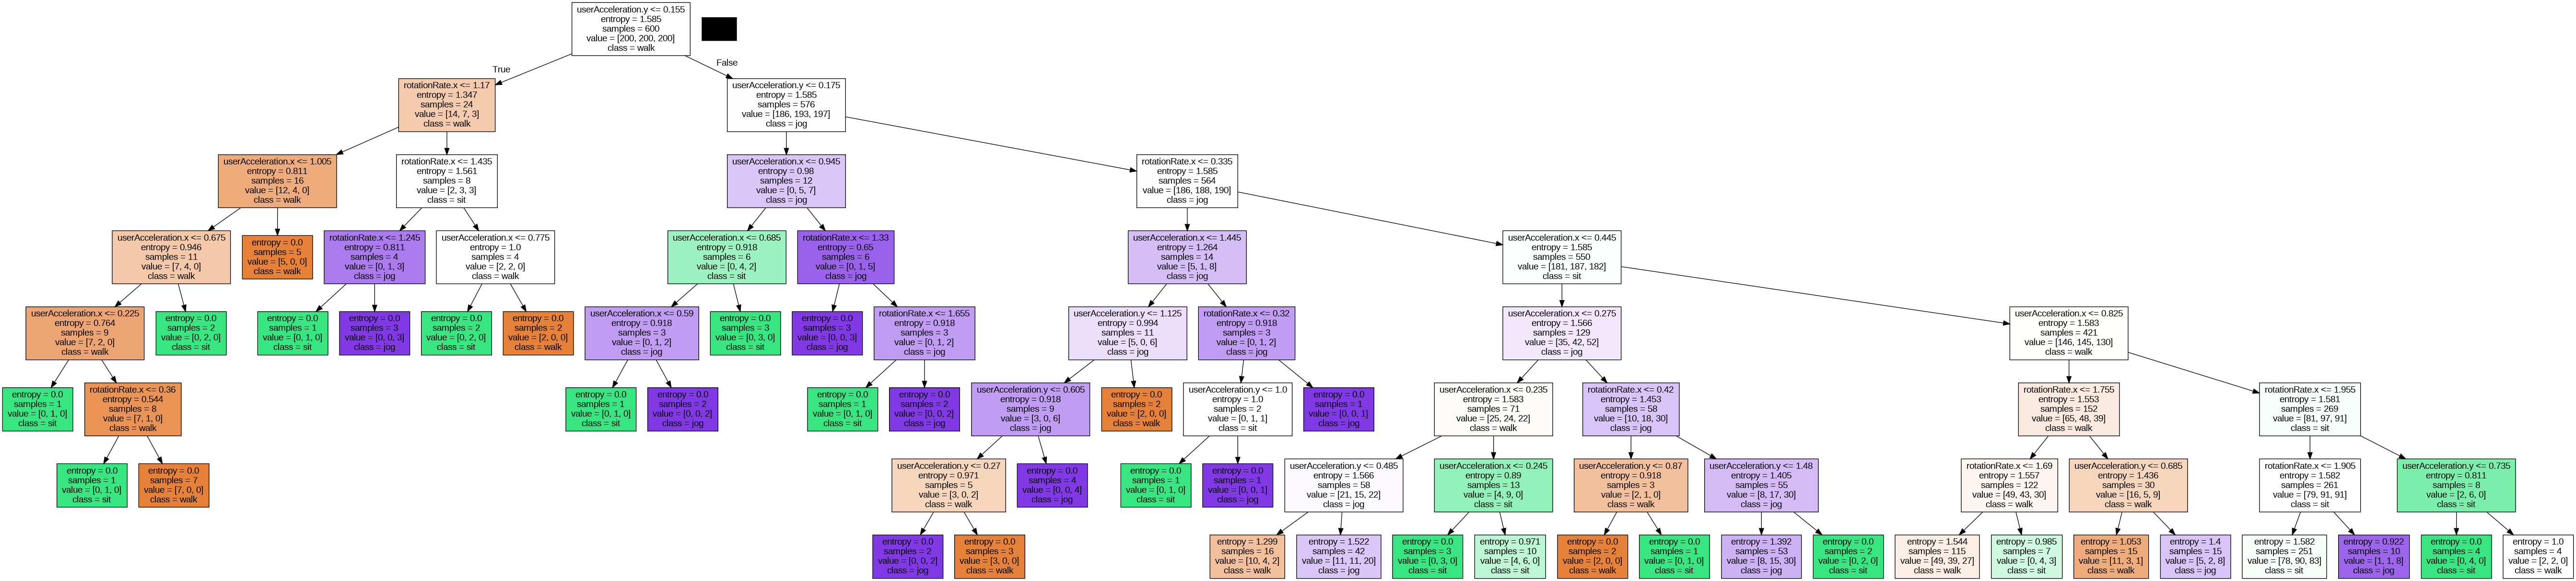

In [60]:
dot_data = tree.export_graphviz(clf, feature_names= X.columns, class_names= ['walk', 'sit', 'jog'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())